In [40]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [41]:
class k_means:

    def __init__(self,dataset,num_clusters,labels=True):
        self.labels = labels
        if labels == False :
            dataset = dataset.drop('cluster_number',axis = 1)
        self.dataset = dataset
        self.k = num_clusters
        self.centroids = None

    def k_random_points(self): 
        """
        desc : Enables us to pick k unique random points from our dataset to act as centroids for our data
        
        output : (list of series) returns k unique random points from our list
        """
        df = self.dataset
        points_not_taken = list(range(df.shape[0]))
        l = []
        for i in range(self.k):
            r = random.randint(0,len(points_not_taken)-1)
            l.append(df.iloc[r])
            points_not_taken.remove(r)
        
        self.centroids = l
        return l

    def score(criteria = 'sum_of_squares'):
        """
        desc : This function evaluates the score on the dataset after k-means on the basis of criterion selected.
        
        criteria : (string) Can have the values - 'sum_of_squares', 'silhouette', 'calinski_harabasz' and 'davies_bouldin' . Default value is 'sum_of_squares'.
        
        output : (float) returns the score.
        """
        
        pass
    
    def distance(self,X1,X2):
        """
        desc : Calculates the square of distance between twwo vectors of same length.
        
        X1 : (panda series) Storing the co-ordinates of X1.
        X2 : (panda series) Storing the co-ordinates of X2.
        
        output : (float) returns the square of distance.
        """
        d = 0
        for i in range(X1.shape[0]):
            d += (X1[i]-X2[i])**2
        return d
    
    def one_run_of_k_means(self):
        """
        desc : One run of k-means algorithm on our dataset.
        
        output : (bool) We return false if our algorithm has converged.
        """
        
        #first we find nearest centroid for each point and store it in l_nearest
        if self.centroids==None:
            self.k_random_points()
        centroids = self.centroids
        l_nearest = []
        df = self.dataset
        
        for i in range(df.shape[0]):
            X = df.iloc[i]
            ind = 0
            min = self.distance(X,centroids[0])
            for j in range(len(centroids)):
                if self.distance(X,centroids[j]) < min :
                    min = self.distance(X,centroids[j])
                    ind = j
            l_nearest.append(ind)
        
        #then we create new dataframe where we merge original df and l_nearest
        
        temp_df = df.assign(clust_ass = l_nearest)
        t = temp_df.groupby('clust_ass')
        
        l = []
        
        for i in range(len(centroids)):
            l.append(pd.Series(t.get_group(i).mean().iloc[:2]))
        
        b = True
        
        for i in range(len(l)):
            if self.distance(l[i],centroids[i])!=0:
                b = False
                break
        
        if b:
            return False
        
        self.centroids = l
        print(self.centroids,l)
        return True
    
    def k_means(self):
        """
        desc : k-means algo on our dataset.
        
        output : (dataframe) returns dataframe where each point also has a cluster number assigned to it.
        """
        iter = 0
        b = self.one_run_of_k_means()
        while(b):
            iter += 1
            b = self.one_run_of_k_means()
        print(iter)
        centroids = self.centroids
        l_nearest = []
        df = self.dataset
        
        for i in range(df.shape[0]):
            X = df.iloc[i]
            ind = 0
            min = self.distance(X,centroids[0])
            for j in range(len(centroids)):
                if self.distance(X,centroids[j]) < min :
                    min = self.distance(X,centroids[j])
                    ind = j
            l_nearest.append(ind)
    
        temp_df = df.assign(clust_ass = l_nearest)
        self.plot(temp_df)
        return temp_df
    
    def plot(self,df):
        df = df.groupby('clust_ass')

        for i in range(self.k):
            t = df.get_group(i)
            x = t['X']
            y = t['Y']
            plt.scatter(x,y,s=1)
        plt.show()

[X     32.333696
Y    179.962097
dtype: float64, X   -84.781110
Y     6.990276
dtype: float64, X    58.364636
Y    22.879149
dtype: float64, X    197.338187
Y    -21.914534
dtype: float64, X   -138.534170
Y   -181.556358
dtype: float64, X    195.267192
Y   -149.734563
dtype: float64, X     29.505777
Y    167.805238
dtype: float64, X   -95.47292
Y    10.14243
dtype: float64, X    184.017813
Y    -15.810855
dtype: float64, X   -172.556908
Y    -71.602386
dtype: float64] [X     32.333696
Y    179.962097
dtype: float64, X   -84.781110
Y     6.990276
dtype: float64, X    58.364636
Y    22.879149
dtype: float64, X    197.338187
Y    -21.914534
dtype: float64, X   -138.534170
Y   -181.556358
dtype: float64, X    195.267192
Y   -149.734563
dtype: float64, X     29.505777
Y    167.805238
dtype: float64, X   -95.47292
Y    10.14243
dtype: float64, X    184.017813
Y    -15.810855
dtype: float64, X   -172.556908
Y    -71.602386
dtype: float64]
[X     31.464165
Y    180.310639
dtype: float64, X   -

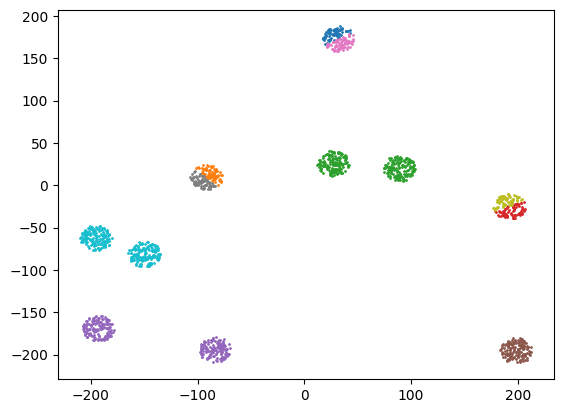

,X,Y,clust_ass
0,88.670150,7.484580,2
1,99.030424,28.250316,2
2,82.879831,26.220008,2
3,-182.648666,-63.225578,9
4,-156.243884,-72.301030,9
...,...,...,...
1495,-188.694101,-166.903149,4
1496,-188.662343,-62.225914,9
1497,182.112998,-14.423525,8
1498,-79.156536,-187.471348,4


In [42]:
df = pd.read_csv('cluster.csv')
o = k_means(df,10,False)

o.k_means()